# This is the notebook to make Fig. 3 for COSN manuscript
By Xiaobians, Chuanpeng Hu, and Qing Wang(Vincent)

In [1]:
# from pathlib import Path
import sys
proj_path_str='/scratch/COSN_Manuscript'
sys.path.append(proj_path_str)
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Read data
data_dir = Path(proj_path_str) / 'data'
fig_dir = Path(proj_path_str) / 'figs'

data_tab_file  = data_dir / 'cosn_events.csv'
data_df = pd.read_csv(data_tab_file, sep=',', header=0, index_col=None)

# format time string
def date2x(df, event_, MODE):
    same_df = df[df['Events']!=event_].copy()
    tmp_df  = df[df['Events']==event_].copy()
    if MODE=='y-m':
        tmp_df['Date'] = [datetime.strptime(x.strip(' '), '%m/%d/%Y').strftime("%Y-%m") for x in tmp_df['Date']]
    elif MODE=='y.m':
        same_df['Date'] = [datetimedatetime.strptime(x.strip(' '), '%Y-%m').strftime("%Y.%m") for x in same_df['Date']]
        tmp_df['Date']  = [datetime.strptime(x.strip(' '), '%m/%d/%Y').strftime("%Y.%m") for x in tmp_df['Date']]
    elif MODE=='DateTime':
        same_df['Date'] = [datetime.strptime(x.strip(' '), '%Y-%m') for x in same_df['Date']]
        tmp_df['Date']  = [datetime.strptime(x.strip(' '), '%m/%d/%Y') for x in tmp_df['Date']]
    else:
        print("Nothing done...")
        return df
    return pd.concat([same_df, tmp_df])

data_df=date2x(data_df, 'OpenTrans', 'DateTime')
raw_df = data_df.copy()
print('Summary statistics of original open science events:')
display(raw_df.groupby('Events').describe())
# 
print('\nChange WE LOST to OpenMinds:')
data_df.loc[:,'Events'] = [ 'OpenMinds' if x =='WE LOST' else x for x in data_df.Events]
print('Summary statistics of open+ events:')
display(data_df.groupby('Events').describe())
data_df['Ref']=data_df['Topic']

events_list = ['OpenTrans', 'OpenTalks', 'OpenTutorials', 'OpenMinds', 'OpenPlus']
ref_list    = ['Face stimulus and tool collection', 'Sam Gershman, Advice for young investigators', 'E.-J. (Eric-Jan) Wagenmakers, Bayes Factor', 'Zhuoyi Fan, Classical statistics: p-value, CI and power', 'Christmas special event: Merry Industry']

for event_str in events_list:
    index_ref=events_list.index(event_str)
    max_indx = data_df[data_df['Events']==event_str]['Reads'].idxmax()
    data_df.iloc[max_indx, 4]= ref_list[index_ref]

Summary statistics of original open science events:


Reads                                                            \
              count         mean          std     min     25%     50%     75%   
Events                                                                          
OpenMinds      29.0  1158.379310   457.109194   607.0   839.0  1023.0  1345.0   
OpenPlus        3.0  2573.666667   896.590393  1887.0  2066.5  2246.0  2917.0   
OpenTalks      27.0  1954.962963  1252.856044   369.0  1174.5  1502.0  2305.0   
OpenTrans      63.0  2321.015873  2485.619722   238.0   792.5  1413.0  2877.5   
OpenTutorials  12.0  1769.000000   720.492256   809.0  1081.0  1676.0  2237.5   
WE LOST        25.0   649.760000   333.749442   299.0   429.0   589.0   721.0   

                        
                   max  
Events                  
OpenMinds       2486.0  
OpenPlus        3588.0  
OpenTalks       5929.0  
OpenTrans      13519.0  
OpenTutorials   2974.0  
WE LOST         1775.0


Change WE LOST to OpenMinds:
Summary statistics of open+ events:


Reads                                                            \
              count         mean          std     min     25%     50%     75%   
Events                                                                          
OpenMinds      54.0   922.907407   475.773383   299.0   609.5   832.0  1124.5   
OpenPlus        3.0  2573.666667   896.590393  1887.0  2066.5  2246.0  2917.0   
OpenTalks      27.0  1954.962963  1252.856044   369.0  1174.5  1502.0  2305.0   
OpenTrans      63.0  2321.015873  2485.619722   238.0   792.5  1413.0  2877.5   
OpenTutorials  12.0  1769.000000   720.492256   809.0  1081.0  1676.0  2237.5   

                        
                   max  
Events                  
OpenMinds       2486.0  
OpenPlus        3588.0  
OpenTalks       5929.0  
OpenTrans      13519.0  
OpenTutorials   2974.0

OpenTrans 56 2019-10-30 00:00:00 13519 Face stimulus and tool collection
OpenTalks 8 2020-10-01 00:00:00 5929 Sam Gershman, Advice for young investigators
OpenTutorials 9 2021-08-01 00:00:00 2974 E.-J. (Eric-Jan) Wagenmakers, Bayes Factor
OpenMinds 38 2020-08-01 00:00:00 2486 Zhuoyi Fan, Classical statistics: p-value, CI and power
OpenPlus 2 2021-12-01 00:00:00 3588 Christmas special event: Merry Industry
saving...


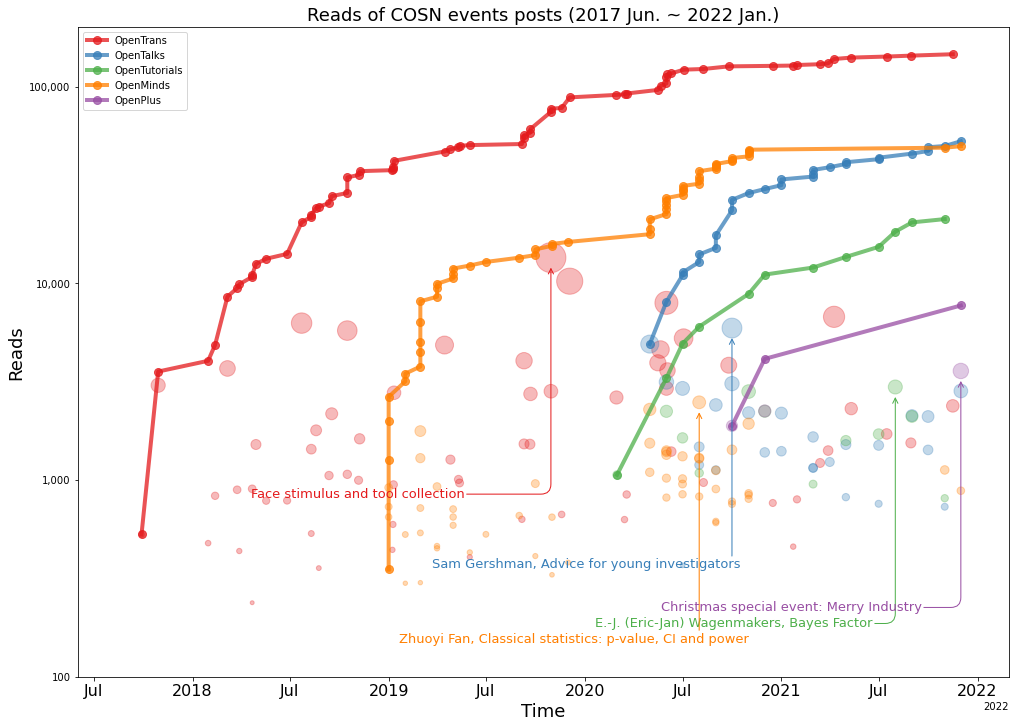

In [2]:
# events scatter and line plot
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.units as munits
from datetime import datetime
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter

save_fig=0
vis_df = data_df.copy()
events_list = ['OpenTrans', 'OpenTalks', 'OpenTutorials', 'OpenMinds', 'OpenPlus']
color_list  = ['#e41a1c',  '#377eb8', '#4daf4a',  '#ff7f00', '#984ea3']
#vis_df['Date'] = [custom_date(float(x)) for x in vis_df['Date']]

figure_size=(14, 10)
X_LIM=['2017-06', '2022-03']
X_LIM=tuple([np.datetime64(x) for x in X_LIM])
Y_TICKS=[2, 3, 4, 5]
Y_TICK_LABELS=['100', '1,000', '10,000', '100,000']
locator = mdates.AutoDateLocator(minticks=5, maxticks=12)
formatter = mdates.ConciseDateFormatter(locator)

f1, ax_lineplot = plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray', constrained_layout=True,) 

for event_str in events_list:
    index_plt=events_list.index(event_str)
    tmp_df=vis_df[vis_df['Events']==event_str].copy().reset_index(drop=True);
    max_indx = tmp_df['Reads'].idxmax()
    x_max=tmp_df.iloc[max_indx, 1]
    y_max=tmp_df.iloc[max_indx, 2]
    text_max=tmp_df.iloc[max_indx, 4]
    print(event_str, max_indx, x_max, y_max, text_max)
    plt.scatter(tmp_df.Date, np.log10(tmp_df.Reads), alpha=0.3, sizes=tmp_df.Reads/15, c=color_list[index_plt])
    tmp_df=tmp_df.sort_values(by=['Date']).copy()
    tmp_df['Reads']=np.cumsum(tmp_df.Reads)
    #display(tmp_df)
    ax_lineplot.annotate(text_max, (mdates.date2num(x_max), np.log10(y_max)), xytext=(-300, -240), c=color_list[index_plt],
                         textcoords='offset points', fontsize=13, arrowprops=dict(arrowstyle="->", facecolor=color_list[index_plt], edgecolor=color_list[index_plt], shrinkA=0, shrinkB=10, connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    plt.plot(tmp_df.Date, np.log10(tmp_df.Reads), linewidth=4, alpha=0.75, marker='o', markersize=8, c=color_list[index_plt]) #, alpha=0.65
    #lineplot
    
for label in ax_lineplot.get_xticklabels():
    label.set_fontsize(16)

ax_lineplot.xaxis.set_major_locator(locator)
ax_lineplot.xaxis.set_major_formatter(formatter)

plt.xlabel('Time', fontsize=18)
plt.ylabel('Reads', fontsize=18)
plt.xlim(X_LIM)
plt.yticks(Y_TICKS, Y_TICK_LABELS)

plt.title('Reads of COSN events posts (2017 Jun. ~ 2022 Jan.)', fontsize=18)
plt.legend(events_list)
ax_lineplot.fmt_xdata = DateFormatter('%Y-%m')
if save_fig: print('saving...'); f1.savefig(( fig_dir / 'Fig3-cosn_events.jpg'), dpi=300, bbox_inches='tight', pad_inches=0.1);

In [3]:
# top 3 reads for all the events
for event_str in events_list:
    print('Top 5 most reads for '+event_str)
    display(data_df[data_df['Events']==event_str].sort_values(by=['Reads'], ascending=False).iloc[:5,:])

Top 5 most reads for OpenTrans


,Events,Date,Reads,Topic,Ref
152,OpenTrans,2019-10-30,13519,面孔材料和工具集合,Face stimulus and tool collection
106,OpenTrans,2019-12-04,10261,Elife | 论文写作或审稿时的十种常见统计错误,Elife | 论文写作或审稿时的十种常见统计错误
151,OpenTrans,2020-06-01,7962,身体图片、声音、工具及中文词汇合集,身体图片、声音、工具及中文词汇合集
128,OpenTrans,2021-04-09,6761,心理学论文写作Word核心素养30条v0.1,心理学论文写作Word核心素养30条v0.1
124,OpenTrans,2018-07-23,6282,心理测量重要文献资源清单,心理测量重要文献资源清单


Top 5 most reads for OpenTalks


,Events,Date,Reads,Topic,Ref
8,OpenTalks,2020-10-01,5929,Sam Gershman 给青年研究者的建议,"Sam Gershman, Advice for young investigators"
0,OpenTalks,2020-05-01,4914,预测论文可重复性 & 70个团队如何实锤fMRI分析的灵活性,预测论文可重复性 & 70个团队如何实锤fMRI分析的灵活性
1,OpenTalks,2020-06-01,3153,如何在神经科学中使用人工神经网络,如何在神经科学中使用人工神经网络
9,OpenTalks,2020-10-01,3093,关于彻底抛弃“统计显著性”概念的倡议的简介及简评,关于彻底抛弃“统计显著性”概念的倡议的简介及简评
2,OpenTalks,2020-07-01,2925,心理科学加速器项目(The Psychological Science Accelerator),心理科学加速器项目(The Psychological Science Accelerator)


Top 5 most reads for OpenTutorials


,Events,Date,Reads,Topic,Ref
39,OpenTutorials,2021-08-01,2974,贝叶斯因子：是什么、怎么做、如何避坑？,"E.-J. (Eric-Jan) Wagenmakers, Bayes Factor"
34,OpenTutorials,2020-11-01,2819,攻克心理学研究中文献查阅的七大难关,攻克心理学研究中文献查阅的七大难关
35,OpenTutorials,2020-12-01,2239,fMRIprep（多模态磁共振数据预处理工具）详解,fMRIprep（多模态磁共振数据预处理工具）详解
31,OpenTutorials,2020-06-01,2237,"Linux, docker与Git入门","Linux, docker与Git入门"
40,OpenTutorials,2021-09-01,2106,C-PAC：灵活易用的静息态功能磁共振批处理工具,C-PAC：灵活易用的静息态功能磁共振批处理工具


Top 5 most reads for OpenMinds


,Events,Date,Reads,Topic,Ref
80,OpenMinds,2020-08-01,2486,第十四讲: 回顾经典—— p值、CI与统计检验力,"Zhuoyi Fan, Classical statistics: p-value, CI ..."
67,OpenMinds,2020-05-01,2287,第1讲：Nature与Science上的文章有几成可被重复？,第1讲：Nature与Science上的文章有几成可被重复？
91,OpenMinds,2020-11-01,1936,第二十五讲: 心理学的理论危机,第二十五讲: 心理学的理论危机
52,OpenMinds,2019-03-01,1775,WE LOST 11：基于贝叶斯因子的样本量分析,WE LOST 11：基于贝叶斯因子的样本量分析
69,OpenMinds,2020-05-01,1540,"第三讲: 重复""棉花糖""实验(1)","第三讲: 重复""棉花糖""实验(1)"


Top 5 most reads for OpenPlus


,Events,Date,Reads,Topic,Ref
29,OpenPlus,2021-12-01,3588,圣诞特别节目：Merry Industry,Christmas special event: Merry Industry
13,OpenPlus,2020-12-01,2246,年终特别篇：To be or not to be——2020逼你二选一,年终特别篇：To be or not to be——2020逼你二选一
10,OpenPlus,2020-10-01,1887,万圣节特别篇：Trick or treat——从学术圈到工业界,万圣节特别篇：Trick or treat——从学术圈到工业界
